In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
# Importing core libraries for numerical computing, data manipulation, and visualization
import numpy as np               # handling numerical operations
import pandas as pd              # creating and managing DataFrames
import seaborn as sns            # configuring statistical visualizations
import matplotlib.pyplot as plt  # plotting and visualizing charts

# Reading the updated books dataset (including simplified and predicted categories)
# from the NLP Project folder in Google Drive
books = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/NLP/NLP Project/books_with_categories.csv")

In [34]:
# Importing the Hugging Face pipeline utility for easy model loading
from transformers import pipeline

# Creating a text-classification pipeline using an emotion detection model
# Setting top_k = None to return scores for all emotion labels
# Setting device = 0 to enable GPU acceleration in Google Colab
classifier = pipeline(
    "text-classification",
    model = "j-hartmann/emotion-english-distilroberta-base",
    top_k = None,
    device = 0
)

# Running the classifier on an example input sentence to test the model
classifier("I love this!")

Device set to use cpu


[[{'label': 'joy', 'score': 0.9771687984466553},
  {'label': 'surprise', 'score': 0.008528684265911579},
  {'label': 'neutral', 'score': 0.005764591973274946},
  {'label': 'anger', 'score': 0.004419785924255848},
  {'label': 'sadness', 'score': 0.002092393347993493},
  {'label': 'disgust', 'score': 0.001611992483958602},
  {'label': 'fear', 'score': 0.0004138524236623198}]]

In [35]:
# Accessing the first book description from the dataset for inspection
books["description"][0]

'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst the world ha

In [36]:
# Running the emotion classifier on the full description of the first book
classifier(books["description"][0])

[[{'label': 'fear', 'score': 0.6548399329185486},
  {'label': 'neutral', 'score': 0.1698525846004486},
  {'label': 'sadness', 'score': 0.11640949547290802},
  {'label': 'surprise', 'score': 0.020700670778751373},
  {'label': 'disgust', 'score': 0.019100721925497055},
  {'label': 'joy', 'score': 0.015161491930484772},
  {'label': 'anger', 'score': 0.003935153596103191}]]

In [37]:
# Running the emotion classifier on each sentence in the description by splitting on periods
classifier(books["description"][0].split("."))

[[{'label': 'surprise', 'score': 0.7296022176742554},
  {'label': 'neutral', 'score': 0.14038586616516113},
  {'label': 'fear', 'score': 0.06816234439611435},
  {'label': 'joy', 'score': 0.047942597419023514},
  {'label': 'anger', 'score': 0.009156372398138046},
  {'label': 'disgust', 'score': 0.002628477057442069},
  {'label': 'sadness', 'score': 0.002122163074091077}],
 [{'label': 'neutral', 'score': 0.44936978816986084},
  {'label': 'disgust', 'score': 0.273592084646225},
  {'label': 'joy', 'score': 0.10908310860395432},
  {'label': 'sadness', 'score': 0.09362740814685822},
  {'label': 'anger', 'score': 0.04047837108373642},
  {'label': 'surprise', 'score': 0.026970159262418747},
  {'label': 'fear', 'score': 0.006879053078591824}],
 [{'label': 'neutral', 'score': 0.6462154984474182},
  {'label': 'sadness', 'score': 0.24273376166820526},
  {'label': 'disgust', 'score': 0.04342268407344818},
  {'label': 'surprise', 'score': 0.02830057218670845},
  {'label': 'joy', 'score': 0.014211485

In [38]:
# Splitting the first book's description into individual sentences for sentence-level emotion analysis
sentences = books["description"][0].split(".")

# Running the emotion classifier on all extracted sentences and storing the predictions
predictions = classifier(sentences)

In [39]:
# Displaying the first sentence extracted from the book description
sentences[0]

'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives'

In [40]:
# Displaying the emotion prediction results for the first sentence
predictions[0]

[{'label': 'surprise', 'score': 0.7296022176742554},
 {'label': 'neutral', 'score': 0.14038586616516113},
 {'label': 'fear', 'score': 0.06816234439611435},
 {'label': 'joy', 'score': 0.047942597419023514},
 {'label': 'anger', 'score': 0.009156372398138046},
 {'label': 'disgust', 'score': 0.002628477057442069},
 {'label': 'sadness', 'score': 0.002122163074091077}]

In [41]:
# Displaying the fourth sentence extracted from the book description
sentences[3]

' Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist'

In [42]:
# Displaying the emotion prediction results for the fourth sentence
predictions[3]

[{'label': 'fear', 'score': 0.9281684160232544},
 {'label': 'anger', 'score': 0.03219080716371536},
 {'label': 'neutral', 'score': 0.012808655388653278},
 {'label': 'sadness', 'score': 0.008756867609918118},
 {'label': 'surprise', 'score': 0.008597898297011852},
 {'label': 'disgust', 'score': 0.008431808091700077},
 {'label': 'joy', 'score': 0.0010455824667587876}]

In [43]:
# Displaying the full list of emotion predictions for all extracted sentences
predictions

[[{'label': 'surprise', 'score': 0.7296022176742554},
  {'label': 'neutral', 'score': 0.14038586616516113},
  {'label': 'fear', 'score': 0.06816234439611435},
  {'label': 'joy', 'score': 0.047942597419023514},
  {'label': 'anger', 'score': 0.009156372398138046},
  {'label': 'disgust', 'score': 0.002628477057442069},
  {'label': 'sadness', 'score': 0.002122163074091077}],
 [{'label': 'neutral', 'score': 0.44936978816986084},
  {'label': 'disgust', 'score': 0.273592084646225},
  {'label': 'joy', 'score': 0.10908310860395432},
  {'label': 'sadness', 'score': 0.09362740814685822},
  {'label': 'anger', 'score': 0.04047837108373642},
  {'label': 'surprise', 'score': 0.026970159262418747},
  {'label': 'fear', 'score': 0.006879053078591824}],
 [{'label': 'neutral', 'score': 0.6462154984474182},
  {'label': 'sadness', 'score': 0.24273376166820526},
  {'label': 'disgust', 'score': 0.04342268407344818},
  {'label': 'surprise', 'score': 0.02830057218670845},
  {'label': 'joy', 'score': 0.014211485

In [44]:
# Sorting the emotion prediction results alphabetically by their label for easier inspection
sorted(predictions[0], key = lambda x: x["label"])

[{'label': 'anger', 'score': 0.009156372398138046},
 {'label': 'disgust', 'score': 0.002628477057442069},
 {'label': 'fear', 'score': 0.06816234439611435},
 {'label': 'joy', 'score': 0.047942597419023514},
 {'label': 'neutral', 'score': 0.14038586616516113},
 {'label': 'sadness', 'score': 0.002122163074091077},
 {'label': 'surprise', 'score': 0.7296022176742554}]

In [45]:
# Defining the set of emotion labels returned by the classifier
emotion_labels = ["anger", "disgust", "fear", "joy", "sadness", "surprise", "neutral"]

# Creating an empty list to store ISBN values later
isbn = []

# Initializing a dictionary to store emotion scores for each label
emotion_scores = {label: [] for label in emotion_labels}

# Defining a function to calculate the maximum score observed for each emotion
# across all predictions for a given book description
def calculate_max_emotion_scores(predictions):
    # Creating a dictionary to store scores per emotion for this specific description
    per_emotion_scores = {label: [] for label in emotion_labels}

    # Looping through each sentence-level prediction returned by the classifier
    for prediction in predictions:
        # Sorting each sentence prediction alphabetically by emotion label
        sorted_predictions = sorted(prediction, key=lambda x: x["label"])

        # Looping through emotion labels in a fixed order and collecting their scores
        for index, label in enumerate(emotion_labels):
            per_emotion_scores[label].append(sorted_predictions[index]["score"])

    # Returning the maximum score observed for each emotion label
    return {label: np.max(scores) for label, scores in per_emotion_scores.items()}

In [46]:
# Looping through the first 10 books to compute emotion scores for each description
for i in range(10):

    # Storing the ISBN of the current book
    isbn.append(books["isbn13"][i])

    # Splitting the book description into individual sentences
    sentences = books["description"][i].split(".")

    # Running the emotion classifier on all sentences
    predictions = classifier(sentences)

    # Calculating the maximum emotion score per label for this description
    max_scores = calculate_max_emotion_scores(predictions)

    # Appending the max score for each emotion label to the emotion_scores dictionary
    for label in emotion_labels:
        emotion_scores[label].append(max_scores[label])

In [47]:
# Displaying the dictionary containing the collected maximum emotion scores for each book
emotion_scores

{'anger': [np.float64(0.0641336739063263),
  np.float64(0.6126192212104797),
  np.float64(0.0641336739063263),
  np.float64(0.3514849543571472),
  np.float64(0.08141248673200607),
  np.float64(0.23222453892230988),
  np.float64(0.5381843447685242),
  np.float64(0.0641336739063263),
  np.float64(0.30066990852355957),
  np.float64(0.0641336739063263)],
 'disgust': [np.float64(0.273592084646225),
  np.float64(0.348284512758255),
  np.float64(0.10400678217411041),
  np.float64(0.15072233974933624),
  np.float64(0.18449552357196808),
  np.float64(0.7271750569343567),
  np.float64(0.15585479140281677),
  np.float64(0.10400678217411041),
  np.float64(0.279481440782547),
  np.float64(0.17792588472366333)],
 'fear': [np.float64(0.9281684160232544),
  np.float64(0.9425276517868042),
  np.float64(0.9723207950592041),
  np.float64(0.3607054650783539),
  np.float64(0.09504339098930359),
  np.float64(0.051362860947847366),
  np.float64(0.7474274039268494),
  np.float64(0.40449756383895874),
  np.flo

In [17]:
# Importing tqdm to display a progress bar during processing
from tqdm import tqdm

# Defining the list of emotion labels returned by the classifier
emotion_labels = ["anger", "disgust", "fear", "joy", "sadness", "surprise", "neutral"]

# Initializing a list to store the ISBN values for each processed book
isbn = []

# Initializing a dictionary that will collect emotion scores for every book, grouped by label
emotion_scores = {label: [] for label in emotion_labels}

# Looping through all books in the dataset with a progress bar to monitor processing
for i in tqdm(range(len(books))):

    # Appending the ISBN of the current book to the ISBN list
    isbn.append(books["isbn13"][i])

    # Splitting the book description into individual sentences for sentence-level emotion analysis
    sentences = books["description"][i].split(".")

    # Running the emotion classifier on all extracted sentences
    predictions = classifier(sentences)

    # Calculating the maximum score of each emotion across all predicted sentences
    max_scores = calculate_max_emotion_scores(predictions)

    # Appending the maximum score for each emotion label into the emotion_scores dictionary
    for label in emotion_labels:
        emotion_scores[label].append(max_scores[label])

100%|██████████| 5197/5197 [26:46<00:00,  3.23it/s]


In [48]:
# Converting the collected emotion scores dictionary into a DataFrame
emotions_df = pd.DataFrame(emotion_scores)

# Adding the ISBN column to link each row of emotion scores to the correct book
emotions_df["isbn13"] = isbn

In [49]:
# Displaying the DataFrame containing maximum emotion scores for each book
emotions_df

,anger,disgust,fear,joy,sadness,surprise,neutral,isbn13
0,0.064134,0.273592,0.928168,0.932798,0.646215,0.967158,0.729602,9780002005883
1,0.612619,0.348285,0.942528,0.704422,0.887940,0.111690,0.252546,9780002261982
2,0.064134,0.104007,0.972321,0.767239,0.549477,0.111690,0.078765,9780006178736
3,0.351485,0.150722,0.360705,0.251881,0.732685,0.111690,0.078765,9780006280897
4,0.081412,0.184496,0.095043,0.040564,0.884390,0.475880,0.078765,9780006280934
5,0.232225,0.727175,0.051363,0.043376,0.621392,0.111690,0.271904,9780006380832
6,0.538184,0.155855,0.747427,0.872566,0.712194,0.408001,0.078765,9780006470229
7,0.064134,0.104007,0.404498,0.040564,0.549477,0.820282,0.234487,9780006472612
8,0.300670,0.279481,0.915524,0.040564,0.840289,0.354461,0.135614,9780006482079
9,0.064134,0.177926,0.051363,0.040564,0.860372,0.111690,0.078765,9780006483014


In [50]:
# Merging the original books DataFrame with the emotions DataFrame using the shared ISBN column
books = pd.merge(books, emotions_df, on = "isbn13")

In [51]:
# Displaying the updated books DataFrame to verify that emotion scores were added correctly
books

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,...,title_and_subtitle,tagged_description,simple_categories,anger,disgust,fear,joy,sadness,surprise,neutral
0,9780002005883,0002005883,Gilead,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,...,Gilead,9780002005883 A NOVEL THAT READERS and critics...,Fiction,0.064134,0.273592,0.928168,0.932798,0.646215,0.967158,0.729602
1,9780002261982,0002261987,Spider's Web,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,...,Spider's Web: A Novel,9780002261982 A new 'Christie for Christmas' -...,Fiction,0.612619,0.348285,0.942528,0.704422,0.887940,0.111690,0.252546
2,9780006178736,0006178731,Rage of angels,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,...,Rage of angels,"9780006178736 A memorable, mesmerizing heroine...",Fiction,0.064134,0.104007,0.972321,0.767239,0.549477,0.111690,0.078765
3,9780006280897,0006280897,The Four Loves,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,...,The Four Loves,9780006280897 Lewis' work on the nature of lov...,Nonfiction,0.351485,0.150722,0.360705,0.251881,0.732685,0.111690,0.078765
4,9780006280934,0006280935,The Problem of Pain,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,...,The Problem of Pain,"9780006280934 ""In The Problem of Pain, C.S. Le...",Nonfiction,0.081412,0.184496,0.095043,0.040564,0.884390,0.475880,0.078765
5,9780006380832,0006380832,Empires of the Monsoon,Richard Hall,"Africa, East",http://books.google.com/books/content?id=MuPEQ...,Until Vasco da Gama discovered the sea-route t...,1998.0,4.41,608.0,...,Empires of the Monsoon: A History of the India...,9780006380832 Until Vasco da Gama discovered t...,Nonfiction,0.232225,0.727175,0.051363,0.043376,0.621392,0.111690,0.271904
6,9780006470229,000647022X,The Gap Into Madness,Stephen R. Donaldson,"Hyland, Morn (Fictitious character)",http://books.google.com/books/content?id=4oXav...,A new-cover reissue of the fourth book in the ...,1994.0,4.15,743.0,...,The Gap Into Madness: Chaos and Order,9780006470229 A new-cover reissue of the fourt...,Fiction,0.538184,0.155855,0.747427,0.872566,0.712194,0.408001,0.078765
7,9780006472612,0006472613,Master of the Game,Sidney Sheldon,Adventure stories,http://books.google.com/books/content?id=TkTYp...,Kate Blackwell is an enigma and one of the mos...,1982.0,4.11,489.0,...,Master of the Game,9780006472612 Kate Blackwell is an enigma and ...,Nonfiction,0.064134,0.104007,0.404498,0.040564,0.549477,0.820282,0.234487
8,9780006482079,0006482074,Warhost of Vastmark,Janny Wurts,Fiction,http://books.google.com/books/content?id=uOL0f...,"Tricked once more by his wily half-brother, Ly...",1995.0,4.03,522.0,...,Warhost of Vastmark,9780006482079 Tricked once more by his wily ha...,Fiction,0.300670,0.279481,0.915524,0.040564,0.840289,0.354461,0.135614
9,9780006483014,0006483011,The Once and Future King,Terence Hanbury White,Arthurian romances,http://books.google.com/books/content?id=Jx6Bv...,An omnibus volume of the author's complete sto...,1996.0,4.04,823.0,...,The Once and Future King,9780006483014 An omnibus volume of the author'...,Fiction,0.064134,0.177926,0.051363,0.040564,0.860372,0.111690,0.078765


In [52]:
# Saving the updated books DataFrame, including emotion scores
books.to_csv(
    "/content/drive/MyDrive/Colab Notebooks/NLP/NLP Project/books_with_emotions.csv",
    index = False
)

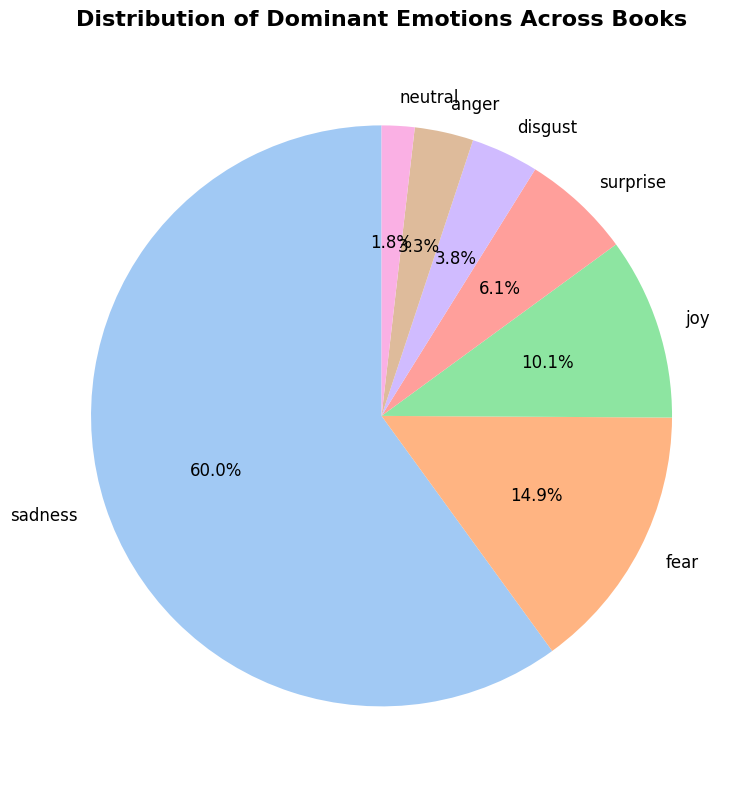


Dominant Emotion Breakdown:
dominant_emotion
sadness     3118
fear         775
joy          527
surprise     316
disgust      196
anger        170
neutral       95
Name: count, dtype: int64


In [24]:
# Find the dominant emotion for each book
books['dominant_emotion'] = books[emotion_labels].idxmax(axis = 1)

# Count dominant emotions
dominant_counts = books['dominant_emotion'].value_counts()

plt.figure(figsize = (10, 8))
colors = sns.color_palette("pastel")
plt.pie(dominant_counts.values, labels = dominant_counts.index, autopct = '%1.1f%%',
        startangle = 90, colors = colors, textprops = {'fontsize': 12})
plt.title("Distribution of Dominant Emotions Across Books",
          fontsize = 16, fontweight = 'bold', pad = 20)
plt.tight_layout()
plt.show()

print("\nDominant Emotion Breakdown:")
print(dominant_counts)

In [27]:
def show_top_books_by_emotion(emotion, n = 3):
    """Display top N books with highest score for given emotion"""
    top_books = books.nlargest(n, emotion)[['title', 'authors', emotion, 'description']]

    print(f"\n{'=' * 80}")
    print(f"TOP {n} BOOKS WITH HIGHEST '{emotion.upper()}' SCORES")
    print('=' * 80)

    for idx, (i, book) in enumerate(top_books.iterrows(), 1):
        print(f"\n{idx}. {book['title']}")
        print(f"   Author: {book['authors']}")
        print(f"   {emotion.capitalize()} Score: {book[emotion]:.3f}")
        print(f"   Description: {book['description'][:200]}...")
        print("-" * 80)

# Show examples for 2-3 emotions (choose emotions that tell a story)
show_top_books_by_emotion('joy', n = 2)
show_top_books_by_emotion('fear', n = 2)


TOP 2 BOOKS WITH HIGHEST 'JOY' SCORES

1. Vernon God Little
   Author: D. B. C. Pierre
   Joy Score: 0.992
   Description: WINNER OF THE MAN BOOKER PRIZE 2003 WINNER OF THE 2003 WHITBREAD FIRST NOVEL PRIZE Named as one of the 100 Best Things in the World by GQ magazine in 2003, the riotous adventures of Vernon Gregory Lit...
--------------------------------------------------------------------------------

2. Wind Child
   Author: Nancy Harding
   Joy Score: 0.992
   Description: Nancy Harding uses her storytelling gifts to depict a young woman who would defy every tradition of her male-dominated society--and triumph! Set against the ancient world of the Scythian tribes of 513...
--------------------------------------------------------------------------------

TOP 2 BOOKS WITH HIGHEST 'FEAR' SCORES

1. The Waiting Sands
   Author: Susan Howatch
   Fear Score: 0.995
   Description: Dearest Raye,' Decima had written...'I'm writing to ask if you can possibly come up to Ruthven for a few d